In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from google.colab import files
from math import radians, sin, cos, sqrt, atan2


Load the CSV file from Google Drive


In [1]:
 import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from google.colab import files
from math import radians, sin, cos, sqrt, atan2


Load the CSV file from Google Drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/folder 1/NYC Taxi Data.csv'

In [5]:
df = pd.read_csv(file_path)


Feature Engineering



# Convert pickup and dropoff datetime columns to datetime objects



In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


# Calculate the trip duration (in seconds)


In [7]:
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()


# Create a function to calculate the Haversine distance


In [13]:
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)

    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c * 1000  # Convert to meters

# Apply the Haversine function to calculate trip distance


In [14]:
invalid_rows = df[
    (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |
    (df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) |
    (df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90) |
    (df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180)
]

# Create features: pickup hour


In [15]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour


# Prepare the data for modeling


In [18]:
print(df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour'],
      dtype='object')


In [19]:
df['trip_distance'] = df.apply(
    lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']),
    axis=1
)


In [20]:
missing_columns = [col for col in ['trip_distance', 'pickup_hour'] if col not in df.columns]
print(f"Missing columns: {missing_columns}")

Missing columns: []


In [22]:
X = df[['trip_distance', 'pickup_hour']]  # Features
y = df['trip_duration']  # Target variable

# Step 4: Split the data into training and testing sets (80% training, 20% testing)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Step 5: Train the Linear Regression model


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Step 6: Make predictions and evaluate the model


In [26]:
y_pred = model.predict(X_test)


# Calculate Mean Squared Error and Root Mean Squared Error


In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 7228.155698863248


# Step 7: Visualize the results


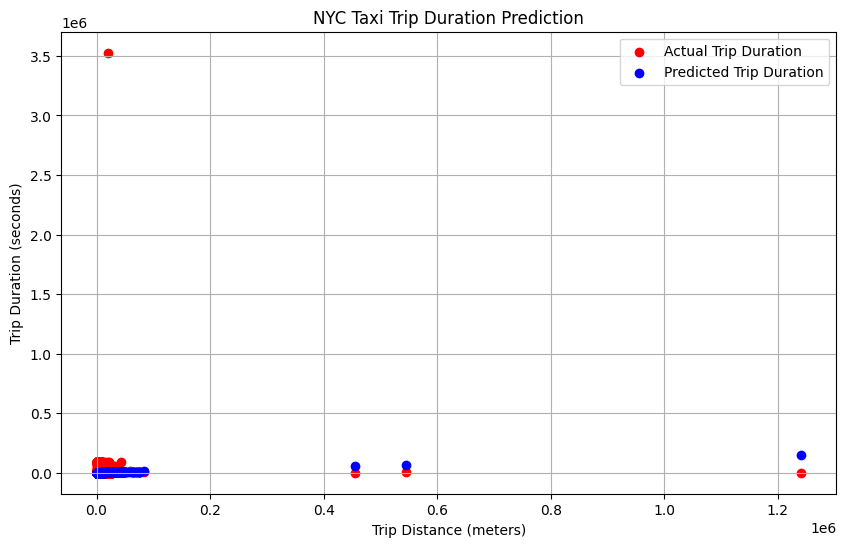

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['trip_distance'], y_test, color='red', label='Actual Trip Duration')
plt.scatter(X_test['trip_distance'], y_pred, color='blue', label='Predicted Trip Duration')
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Trip Duration (seconds)')
plt.title('NYC Taxi Trip Duration Prediction')
plt.legend()
plt.grid(True)
plt.show()
